##  Algoritmo 1

*   Santiago Andres vela Aguilera | 202026767
*   Aplicar diferentes técnicas de pre-procesamiento de textos.



## Problema
Para apoyar a UNFPA en este proceso se ha planteado el primer proyecto del curso, cuyo objetivo es desarrollar un modelo de clasificación, con técnicas de aprendizaje automático, que permita relacionar de manera automática un texto según los ODS

### 1. Instalación e importación de librerías.


Intentamos instalar  pandas-profiling para entender un poco mas la informacion sobre las entrevistas que nos mandan, si embargo tuvimos resultados poco esperados debido a que la libreria no estaba disponible, y no pudimos encontrar una solucion a instalar dicha libreria

In [ ]:
import sys
!{sys.executable} -m pip install pandas-profiling

## 1. Carga y instalacion de librerías necesarias para implementación



La inclusión de bibliotecas de procesamiento de lenguaje natural (NLP), como ***NLTK (Natural Language Toolkit)***, y la descarga de recursos esenciales, como "punkt" para la tokenización, "stopwords" para la eliminación de palabras comunes y  **"wordnet"** para el acceso a léxicos, proporciona una ventaja significativa en la eficiencia y efectividad del procesamiento de texto. Estas herramientas simplifican tareas críticas en NLP, como separar un texto en frases, eliminar palabras irrelevantes y acceder a recursos lingüísticos para desambiguación y enriquecimiento del texto.

In [ ]:
import nltk
from nltk.corpus import stopwords

# Punkt permite separar un texto en frases.
nltk.download('punkt')


nltk.download('wordnet')



nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys

from sklearn.ensemble import RandomForestClassifier


from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer


import re, string, unicodedata
#import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer


from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt


import pandas as pd
# Para preparar los datos
# Para crear el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Para usar KNN como clasificador
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Versiones anteriores a 1.2 de sklearn: from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import sklearn as sklearn


### 2. Perfilamiento y entendimiento de los datos

Seguido a esto  convertimos el archivo que nos da por parametro en un archivo de tipo **csv** para que sea de mayor facilidad entender y separar las palabras mas adelante

In [ ]:
df = pd.read_csv('cat_6716.csv', delimiter=';')
supatest=pd.read_csv('SinEtiquetatest_cat_6716.csv', delimiter=',')



# Asignación a una nueva variable de los datos leidos
data_t=df

data_t
supatest=supatest.drop(columns="sdg")
supatest

,Textos_espanol
0,1. 1. Introducción: Las Estructuras del Derech...
1,Las aguas subterráneas se han debatido en el c...
2,La presente contribución evalúa la jurispruden...
3,"Sin embargo, este crédito fiscal expira en 201..."
4,"Este estudio explora las actitudes, comportami..."
...,...
975,Este artículo explora la historia y el impacto...
976,Mientras que algunos dan mayor énfasis a la ma...
977,Una innovación importante para garantizar el s...
978,El Salvador continúa luchando con niveles elev...


Nos podemos dar cuenta que en referencia a nuestos ODS ( objetivos de desarrollo sostenible ) no tenemos problema de validez, debido a que no hay valores anomalos ya que en teoria los textos que se tienen cumplen con la clasificacion "esperada"

In [ ]:
conteo = df['sdg'].value_counts()


print(conteo)

6     1000
7     1000
16    1000
Name: sdg, dtype: int64


In [ ]:
textos = data_t.copy()


import statistics

textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
moda_longitud = statistics.mode([len(x) for x in textos['Textos_espanol']])
textos['Moda'] = [moda_longitud] * len(textos)

textos['Max'] = [max([len(x) for x in textos['Textos_espanol']])] * len(textos)
textos['Min'] = [min([min([len(x) for x in i.split(' ')]) for i in textos['Textos_espanol']])] * len(textos)


print(textos)

                                         Textos_espanol  sdg  Conteo  Moda  \
0     Es importante destacar que, en un año de sequí...    6     621   468   
1     Hay una gran cantidad de literatura sobre Aust...    6     881   468   
2     Los procesos de descentralización, emprendidos...    6     579   468   
3     Esto puede tener consecuencias sustanciales pa...    6     706   468   
4     La función de beneficio también incorpora pará...    6     673   468   
...                                                 ...  ...     ...   ...   
2995  "Forjando una Convención para los Crímenes con...   16    1056   468   
2996  En 2016, Daragh Murray publicó su libro Obliga...   16     942   468   
2997  En este libro, el autor argumenta que el activ...   16     749   468   
2998  * Facultad de Derecho, Universidad de Manchest...   16     993   468   
2999  Este caso 1 constituye el primer pronunciamien...   16     618   468   

       Max  Min  
0     1616    0  
1     1616    0  
2     161

In [ ]:
textos2 = supatest.copy()


import statistics

textos2['Conteo'] = [len(x) for x in textos2['Textos_espanol']]
moda_longitud = statistics.mode([len(x) for x in textos2['Textos_espanol']])
textos2['Moda'] = [moda_longitud] * len(textos2)

textos2['Max'] = [max([len(x) for x in textos2['Textos_espanol']])] * len(textos2)
textos2['Min'] = [min([min([len(x) for x in i.split(' ')]) for i in textos2['Textos_espanol']])] * len(textos2)


print(textos2)

                                        Textos_espanol  Conteo  Moda   Max  \
0    1. 1. Introducción: Las Estructuras del Derech...     764   782  1977   
1    Las aguas subterráneas se han debatido en el c...     936   782  1977   
2    La presente contribución evalúa la jurispruden...    1022   782  1977   
3    Sin embargo, este crédito fiscal expira en 201...     515   782  1977   
4    Este estudio explora las actitudes, comportami...    1155   782  1977   
..                                                 ...     ...   ...   ...   
975  Este artículo explora la historia y el impacto...    1043   782  1977   
976  Mientras que algunos dan mayor énfasis a la ma...     512   782  1977   
977  Una innovación importante para garantizar el s...     482   782  1977   
978  El Salvador continúa luchando con niveles elev...     793   782  1977   
979  También puede reflejar una baja conciencia sob...     794   782  1977   

     Min  
0      0  
1      0  
2      0  
3      0  
4      0

Podemos darnos cuenta que con la informacion recibida, no se tienen ningunos registros repetidos lo cual es bueno ya que nos tendremos que analizar porque estan duplicados los registros,

In [ ]:
data_t.duplicated().sum()



0

In [ ]:
supatest.duplicated().sum()

0

De igual manera nos podemos dar cienta que  no hay numeros en el texto y que no hay una entrevista "sucia" la cual se compone solo de numeros, sin embargo esto no significa que todos los registros que tenemos son limpios

In [ ]:
data_t.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  3000 non-null   object
 1   sdg             3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
supatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  980 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [ ]:
data_t.describe

<bound method NDFrame.describe of                                          Textos_espanol  sdg
0     Es importante destacar que, en un año de sequí...    6
1     Hay una gran cantidad de literatura sobre Aust...    6
2     Los procesos de descentralización, emprendidos...    6
3     Esto puede tener consecuencias sustanciales pa...    6
4     La función de beneficio también incorpora pará...    6
...                                                 ...  ...
2995  "Forjando una Convención para los Crímenes con...   16
2996  En 2016, Daragh Murray publicó su libro Obliga...   16
2997  En este libro, el autor argumenta que el activ...   16
2998  * Facultad de Derecho, Universidad de Manchest...   16
2999  Este caso 1 constituye el primer pronunciamien...   16

[3000 rows x 2 columns]>

In [ ]:
supatest.describe

<bound method NDFrame.describe of                                         Textos_espanol
0    1. 1. Introducción: Las Estructuras del Derech...
1    Las aguas subterráneas se han debatido en el c...
2    La presente contribución evalúa la jurispruden...
3    Sin embargo, este crédito fiscal expira en 201...
4    Este estudio explora las actitudes, comportami...
..                                                 ...
975  Este artículo explora la historia y el impacto...
976  Mientras que algunos dan mayor énfasis a la ma...
977  Una innovación importante para garantizar el s...
978  El Salvador continúa luchando con niveles elev...
979  También puede reflejar una baja conciencia sob...

[980 rows x 1 columns]>

### 3. Preparación de datos

Para poder realizar el pre-procesamiento de los datos, es recomendable pasar por tres etapas:
* Limpieza de los datos.
* Tokenización.
* Normalización.

### 3.1 Limpieza de datos

Esta función es útil para eliminar caracteres no ASCII de una listas de palabras tokenizadas en español. Esto permitira  limpiar los textos  de caracteres especiales o caracteres no latinos que no son relevantes para el análisis de texto, en este caso debido a que importamos la liberia vamos a solo trabajar con palabras en español

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

Esta función nos posibilitará la conversión de todas las palabras a minúsculas, una práctica común en el procesamiento de texto en español con el fin de garantizar que las palabras en mayúsculas y minúsculas sean tratadas de manera uniforme. Esta normalización facilita la comparación y el análisis de manera más efectiva.

In [ ]:
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()  # Convierte la palabra a minúsculas
        new_words.append(new_word)
    return new_words

Eliminar la puntuación de una lista de palabras es útil para eliminar caracteres no alfabéticos o especiales que no aportan información semántica al texto en español. como puntos y comas

In [ ]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

Reemplazamos  números en una lista de palabras con su representación textual nos ayudara bastante debido que las ODS que tenemos son mas de numeros y de cifras entonces al convertir el numero en palabra sera mas facil darle un valor

In [ ]:
def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

Igualmente laa eliminación de palabras vacías (stop words) para las estrevistas es esencial para eliminar palabras comunes que no aportan información significativa al análisis de texto, como "el", "la", "de", etc.

In [ ]:
def remove_stopwords(words):

    stop_words = set(stopwords.words('spanish'))  # Utilizamos 'spanish' para obtener la lista de palabras vacías en español
    new_words = [word for word in words if word.lower() not in stop_words]
    return new_words

Esta función combina las funciones anteriores en un solo paso de preprocesamiento. Realiza la conversión a minúsculas, reemplaza números con su representación textual, elimina la puntuación, caracteres no ASCII y palabras vacías en español.

In [ ]:
def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [ ]:
total_rows = data_t.shape[0]
total_rows

3000

In [ ]:
total_rows = supatest.shape[0]
total_rows

980

### 3.2 Tokenización


En primer lugar, realiza la tokenización de palabras, dividiendo el texto en unidades más manejables, lo que es fundamental para el procesamiento de texto. Luego, aplica una función de preprocesamiento que elimina el ruido, como signos de puntuación, números y stopwords, lo que mejora significativamente la calidad de los datos. Además, asegura la uniformidad en el formato de los datos, lo que facilita el análisis textual posterior al tratar las palabras de manera uniforme, independientemente de su capitalización o la presencia de elementos no deseados.

In [ ]:
data_t['palabras'] = data_t['Textos_espanol'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data_t.head()

,Textos_espanol,sdg,palabras
0,"Es importante destacar que, en un año de sequí...",6,"[importante, destacar, ano, sequia, espera, di..."
1,Hay una gran cantidad de literatura sobre Aust...,6,"[gran, cantidad, literatura, australia, area, ..."
2,"Los procesos de descentralización, emprendidos...",6,"[procesos, descentralizacion, emprendidos, ser..."
3,Esto puede tener consecuencias sustanciales pa...,6,"[puede, tener, consecuencias, sustanciales, ca..."
4,La función de beneficio también incorpora pará...,6,"[funcion, beneficio, tambien, incorpora, param..."


In [ ]:
supatest['palabras'] = supatest['Textos_espanol'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
supatest.head()

,Textos_espanol,palabras
0,1. 1. Introducción: Las Estructuras del Derech...,"[one, one, introduccion, estructuras, derecho,..."
1,Las aguas subterráneas se han debatido en el c...,"[aguas, subterraneas, debatido, contexto, tari..."
2,La presente contribución evalúa la jurispruden...,"[presente, contribucion, evalua, jurisprudenci..."
3,"Sin embargo, este crédito fiscal expira en 201...","[embargo, credito, fiscal, expira, two thousan..."
4,"Este estudio explora las actitudes, comportami...","[estudio, explora, actitudes, comportamientos,..."


Podemos darnos cuenta como quedan los textos en los cuales ya no se aprecian plabras que generan ruido, de la misma forma, nos podemos dar cuenta que las palabras se han reducido esto con el fin de no leer toda la palabra si no que al saber una abreviacion ya podemos saber el significado de la palabra, igualmente,  nos permite mejorar la dimensionalidad en representaciones vectoriales del texto

In [ ]:
print(data_t["palabras"][0],"\n" ,data_t["Textos_espanol"][0])

['importante', 'destacar', 'ano', 'sequia', 'espera', 'disminuyan', 'aportes', 'aumente', 'demanda', 'agua', 'cultivos', 'vegetacion', 'provocara', 'reduccion', 'caudal', 'rios', 'estan', 'conectados', 'hidrologicamente', 'acuifero', 'asi', 'menor', 'disponibilidad', 'agua', 'ecosistemas', 'dependientes', 'aguas', 'subterraneas', 'externalidades', 'espaciales', 'pueden', 'incluir', 'agotamiento', 'cursos', 'agua', 'descenso', 'nivel', 'freatico', 'local', 'ejemplo', 'bombeo', 'continuo', 'pozo', 'b', 'provocara', 'agotamiento', 'cursos', 'agua', 'reduccion', 'caudal'] 
 Es importante destacar que, en un año de sequía, se espera que disminuyan todos los aportes, pero que aumente la demanda de agua de los cultivos y de la vegetación, lo que provocará una reducción del caudal de los ríos que están conectados hidrológicamente con el acuífero, así como una menor disponibilidad de agua para otros ecosistemas dependientes de las aguas subterráneas. Estas externalidades espaciales pueden inclu

In [ ]:
print(supatest["palabras"][0],"\n" ,supatest["Textos_espanol"][0])

['one', 'one', 'introduccion', 'estructuras', 'derecho', 'penal', 'two', 'estandar', 'persona', 'razonable', 'derecho', 'penal', 'three', 'responsabilidad', 'penal', 'delincuentes', 'suerte', 'resultante', 'responsabilidad', 'penal', 'four', 'four', 'criminalizacion', 'sadomasoquismo', 'negacion', 'erotico', 'instanciacion', 'violencia', 'five', 'constitucionalismo', 'limites', 'derecho', 'penal', 'six', 'delincuencia', 'internacional', 'contexto', 'contraste', 'forma', 'juridica', 'juicio', 'moral', 'eutanasia', 'suicidio', 'asistido', 'eight', 'derecho', 'anormal', 'teratologia', 'logica', 'criminalizacion', 'nine', 'tensiones', 'criminalizacion', 'desierto', 'empirico', 'cambio', 'normas', 'reforma', 'violacion', 'ten', 'delitos', 'preparacion', 'intereses', 'seguridad', 'libertad', 'politica', 'delitos', 'preparacion', 'intereses', 'seguridad', 'libertad', 'politica'] 
 1. 1. Introducción: Las Estructuras del Derecho Penal 2. El Estándar de la Persona Razonable en el Derecho Penal 

### 3.3 Normalizacion


De igual manera usaremos dos técnicas fundamentales: stemming y lematización, aplicadas en el contexto del idioma español. El SnowballStemmer se encargara  de llevar a las palabras a su forma raíz, lo que simplifica y normaliza el texto, facilitando la comparación de palabras relacionadas. Por otro lado, el **WordNetLemmatizer** realiza la lematización, que es un proceso más sofisticado que el stemming y permite reducir las palabras a su forma base o lema. Combinando ambas técnicas, este código crea una función que transforma las palabras de entrada en una lista de sus formas stem y lema. Esto es valioso para tareas de análisis de texto, procesamiento de información y modelado de lenguaje, ya que ayuda a comprender y representar el texto de manera más efectiva, mejorando la calidad de los datos y su utilidad en diversas aplicaciones de NLP.

In [ ]:
stemmer = SnowballStemmer("spanish")
lemmatizer = WordNetLemmatizer()

# Función para realizar stemming y lematización en español
def stem_and_lemmatize(words):
    stems = [stemmer.stem(word) for word in words]
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return stems + lemmas




Aplicamos la lematización y Eliminación de Prefijos y Sufijos.

In [ ]:
data_t['palabras'] = data_t['palabras'].apply(stem_and_lemmatize)
data_t.head()

,Textos_espanol,sdg,palabras
0,"Es importante destacar que, en un año de sequí...",6,"[import, destac, ano, sequi, esper, disminu, a..."
1,Hay una gran cantidad de literatura sobre Aust...,6,"[gran, cantid, literatur, australi, are, sugie..."
2,"Los procesos de descentralización, emprendidos...",6,"[proces, descentraliz, emprend, seri, activ, r..."
3,Esto puede tener consecuencias sustanciales pa...,6,"[pued, ten, consecuent, sustancial, calid, agu..."
4,La función de beneficio también incorpora pará...,6,"[funcion, benefici, tambi, incorpor, parametr,..."


In [ ]:
supatest['palabras'] = supatest['palabras'].apply(stem_and_lemmatize)
supatest.head()

,Textos_espanol,palabras
0,1. 1. Introducción: Las Estructuras del Derech...,"[one, one, introduccion, estructur, derech, pe..."
1,Las aguas subterráneas se han debatido en el c...,"[agu, subterran, debat, context, tarif, financ..."
2,La presente contribución evalúa la jurispruden...,"[present, contribucion, evalu, jurisprudent, t..."
3,"Sin embargo, este crédito fiscal expira en 201...","[embarg, credit, fiscal, expir, two thousand a..."
4,"Este estudio explora las actitudes, comportami...","[estudi, explor, actitud, comport, percepcion,..."


##### **3.4 Selección de campos**

Primero, se separa la variable predictora y los textos que se van a utilizar.

In [ ]:
data_t['palabras'] = data_t['palabras'].apply(lambda x: ' '.join(map(str, x)))
data_t

,Textos_espanol,sdg,palabras
0,"Es importante destacar que, en un año de sequí...",6,import destac ano sequi esper disminu aport au...
1,Hay una gran cantidad de literatura sobre Aust...,6,gran cantid literatur australi are sugier fuer...
2,"Los procesos de descentralización, emprendidos...",6,proces descentraliz emprend seri activ realiz ...
3,Esto puede tener consecuencias sustanciales pa...,6,pued ten consecuent sustancial calid agu espec...
4,La función de beneficio también incorpora pará...,6,funcion benefici tambi incorpor parametr afect...
...,...,...,...
2995,"""Forjando una Convención para los Crímenes con...",16,forj convencion crimen human inclu text conven...
2996,"En 2016, Daragh Murray publicó su libro Obliga...",16,two thousand and sixt daragh murray public lib...
2997,"En este libro, el autor argumenta que el activ...",16,libr autor argument activ judicial dirig prote...
2998,"* Facultad de Derecho, Universidad de Manchest...",16,facult derech univers manchest one sw v secret...


In [ ]:
supatest['palabras'] = supatest['palabras'].apply(lambda x: ' '.join(map(str, x)))
supatest

,Textos_espanol,palabras
0,1. 1. Introducción: Las Estructuras del Derech...,one one introduccion estructur derech penal tw...
1,Las aguas subterráneas se han debatido en el c...,agu subterran debat context tarif financi ocde...
2,La presente contribución evalúa la jurispruden...,present contribucion evalu jurisprudent tribun...
3,"Sin embargo, este crédito fiscal expira en 201...",embarg credit fiscal expir two thousand and tw...
4,"Este estudio explora las actitudes, comportami...",estudi explor actitud comport percepcion etic ...
...,...,...
975,Este artículo explora la historia y el impacto...,articul explor histori impact accion afirm ser...
976,Mientras que algunos dan mayor énfasis a la ma...,mientr dan mayor enfasis manipul preci financi...
977,Una innovación importante para garantizar el s...,innov import garantiz soport efect tgc tecnolo...
978,El Salvador continúa luchando con niveles elev...,salvador continu luch nivel elev violenci crim...


Esta caso como nuestro objetivo principal es usar un modelo de clasificacion de arboles tendremos que separar las variables objetivo de las otra variables, algo bueno que tenemos es que la variable objetivo ya esta en numeros, y no tenemos que preocuparnos por hacer algun cambio debido a que los numeros que hay son los numeros que necesitamos

In [ ]:
X_data, y_data = data_t['palabras'],data_t['sdg']
super_data=supatest["palabras"]
y_data


y_data.value_counts()


6     1000
7     1000
16    1000
Name: sdg, dtype: int64

En este caso tenemos podemos usar dos técnicas de vectorización de texto comunes en el procesamiento de lenguaje natural. Ambas se pueden usar  para convertir los textos  en datos numéricos.

In [ ]:
dummy = CountVectorizer(binary=True)
X_dummy = dummy.fit_transform(X_data)
print(X_dummy.shape)
X_dummy.toarray()[0]

(3000, 28178)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
dummy = CountVectorizer(binary=True)
supa_dummy = dummy.fit_transform(super_data)
print(supa_dummy.shape)
supa_dummy.toarray()[0]

(980, 16802)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Sin embargo decidimos usar la libreria **TfidfVectorizer** ya que Asigna valores más altos a las palabras que son frecuentes en un documento pero raras en otros, lo que permite identificar palabras que son distintivas de un documento en particular, de la misma manera, Puede manejar automáticamente palabras vacías y realizar normalización, lo que simplifica el preprocesamiento del texto.


In [ ]:
tfidf_vectorizer = TfidfVectorizer()

# Ajustar y transformar los documentos
X_tf_idf = tfidf_vectorizer.fit_transform(X_data)
supa_tf_idf = tfidf_vectorizer.fit_transform(super_data)


# Mostrar la forma de la matriz TF-IDF
print("Forma de la matriz TF-IDF:", X_tf_idf.shape)
# Mostrar la forma de la matriz supa.tf-IDF
print("Forma de la matriz supa-TF-IDF:", supa_tf_idf.shape)

# Mostrar la representación TF-IDF del primer documento
print("TF-IDF del primer documento:")
print(X_tf_idf.toarray()[0])

# Mostrar la representación TF-IDF del primer documento
print("supa-TF-IDF del primer documento:")
print(supa_tf_idf.toarray()[0])

Forma de la matriz TF-IDF: (3000, 28178)
Forma de la matriz supa-TF-IDF: (980, 16802)
TF-IDF del primer documento:
[0. 0. 0. ... 0. 0. 0.]
supa-TF-IDF del primer documento:
[0. 0. 0. ... 0. 0. 0.]


En la mayoría de las aplicaciones de procesamiento de lenguaje natural, **TfidfVectorizer** suele ser la elección preferida debido a su capacidad para identificar palabras clave y su capacidad para lidiar con palabras vacías y realizar normalización automáticamente.

#  4.Creación y Aplicación del modelo 1



El texto se dividiera en particiones ya que se utilizaran para entrenar el modelo de aprendizaje automático en el conjunto de entrenamiento (X_train y y_train) y luego evaluar su rendimiento en el conjunto de prueba (X_test y y_test) para medir su capacidad de generalización y hacer predicciones precisas en datos no vistos.

In [ ]:
supydata=y_data[980:]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tf_idf, y_data, test_size=0.2, random_state=0)

Continuaremos  creando el  modelo de clasificación de árbol de decisión con una profundidad máxima de 4 y utilizaremos  la entropía como criterio de división. Este modelo se almacena en la variable arbol y se puede usar para entrenar y predecir con datos de clasificación.

In [ ]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state = 0)
arbol

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

Lo que haremos es  para el proceso de entrenamiento del  modelo  ya que nos permitira  que el modelo "aprenda" a partir de los datos de entrenamiento.

In [ ]:
arbol = arbol.fit(X_train,Y_train)

y ahora con la particion de datos que usamos, vamos a predecir lo valores de ciertos textos para mirar como el modelo se entreno y para posterior determinar si quizas el modelo se deben nutrir con mas informacion y mas textos

In [ ]:
y_pred = arbol.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test, y_pred)

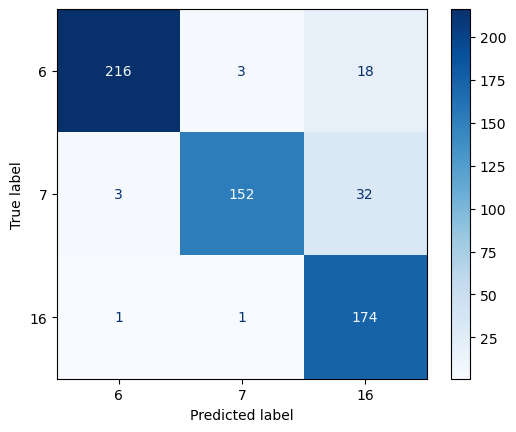

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

Y Nos podemos dar cuenta que  El modelo clasificó correctamente 216 instancias en la categoría ODS 6. Sin embargo, hubo 3 instancias de ODS 6 que se clasificaron incorrectamente como ODS 7 y 1 instancias de ODS 6 que se clasificaron incorrectamente como ODS 16.  

Por otra parte, El modelo clasificó correctamente 152 instancias en la categoría ODS 7. Hubo 3 instancias de ODS 7 que se clasificaron incorrectamente como ODS 6 y 1 instancias de ODS 7 que se clasificaron incorrectamente como ODS 16.

El modelo clasificó correctamente 174 instancias en la categoría ODS 16. Hubo 18 instancias de ODS 16 que se clasificó incorrectamente como ODS 6 y 32 instancia de ODS 16 que se clasificó incorrectamente como ODS 7.

In [ ]:
confusion_matrix(Y_test, y_pred)

array([[216,   3,  18],
       [  3, 152,  32],
       [  1,   1, 174]], dtype=int64)

En base a los resultados obtenidos podemos decir que:

 en (Accuracy): El valor de 0.90 indica que el 90% de las predicciones realizadas por el modelo son correctas. Esto sugiere un buen rendimiento general del modelo.

 Por otro lado Recall obtuvo  un valor de 0.9033, el modelo tiene un alto nivel de "recall" (también conocido como "sensibilidad" o "true positive rate"). Esto significa que el modelo es eficiente para identificar ejemplos positivos en el conjunto de datos.

 En cuanto a la presicion indica que el 91.94% de las instancias que el modelo clasifica como positivas son realmente positivas. Esto sugiere que el modelo minimiza las falsas alarmas.

 Y en cuanto al F1 score  de 0.9048 es una medida que combina tanto la precisión como el recall en una sola métrica. Es especialmente útil cuando hay un desequilibrio entre las clases. Un valor alto de la puntuación F1 indica un buen equilibrio entre precisión y recall.

In [ ]:


print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))

print("Recall: {}".format(recall_score(Y_test,y_pred, average='weighted')))
print("Precisión: {}".format(precision_score(Y_test,y_pred, average='weighted')))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred, average='weighted')))

Exactitud: 0.90
Recall: 0.9033333333333333
Precisión: 0.9193505383505385
Puntuación F1: 0.9048210337839419


In [ ]:
importancia= arbol.feature_importances_
importancia

array([0., 0., 0., ..., 0., 0., 0.])

## 4.1 Creación y Aplicación del modelo con HIPER PARAMETROS


Ahora para esta nueva prueba aplicariemos Hiper parametros con nuestro modelo para evaluar si es correcto o no

In [ ]:

# combinación específica de hiperparámetros.
X_trainval, X_val, Y_trainval, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state = 0)

Fijaremos  un valor de max_depth en 8, construyamos el modelo y probemos sobre validación. Utilicemos la exactitud como métrica


In [ ]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 8, random_state=0)
arbol = arbol.fit(X_trainval,Y_trainval)

Ahora configuraremos  validación cruzada K-Foldpara evaluar el rendimiento de un modelo de aprendizaje automático. Con los parámetros n_splits=10, lo que significa que estaremos  dividiendo tus datos en 10 "pliegues" o subconjuntos. Y con la  opción shuffle=True indicaremos  que se realizará una mezcla aleatoria de los datos antes de la división, lo que ayuda a evitar sesgos en la partición.

In [ ]:
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [ ]:
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20]}

In [ ]:
arbol = DecisionTreeClassifier(random_state=0)

Ahora realizaremos una búsqueda sistemática de hiperparámetros para el modelo de árbol de decisión y luego entrena un nuevo modelo con los hiperparámetros óptimos encontrados. Esto te permitira  mejorar el rendimiento del modelo al encontrar la mejor combinación de parámetros que se adapta a nuestros textos

In [ ]:
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20]})

In [ ]:
mejor_modelo.best_params_

{'criterion': 'entropy', 'max_depth': 20}

los nuevos resultados indican un rendimiento excepcionalmente alto para el algoritmo.

pasando de una Exactitud de **0.90 a  0.99**
pasando de  Recall de  **0.903 a 0.95**

y un puntuaje de F1 score de   **0.90 a 0.95**

Exactitud: 0.90
Recall: 0.9033333333333333
Precisión: 0.9193505383505385
Puntuación F1: 0.9048210337839419

En cuanto al F1 score es alta y equilibrada, lo que sugiere que el modelo mantiene un buen equilibrio entre precisión y recall.
y sobre la Exactitud   del 0.95 es un indicador sólido de la capacidad del modelo para realizar predicciones precisas.

In [ ]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))


print("Precisión: {}".format(precision_score(Y_test,y_pred_test, average='weighted')))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred_test, average='weighted')))



Exactitud sobre entrenamiento: 0.99
Exactitud sobre test: 0.95
Precisión: 0.9527038347751189
Puntuación F1: 0.9518236985310751


In [ ]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           6       0.97      0.95      0.96       237
           7       0.91      0.97      0.94       187
          16       0.97      0.94      0.95       176

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



Nos podemos dar cuenta que en la nueva matriz que hicimos la cantidad de acertar a los valores aumenta, respecto a el ODS 16 son mas la cantidad de registros que podemos predecir exactos, por otra parte si bien es cierto que el numeero de falso positivo aumento esto no implica que mi algoritmo no haya mejorado

In [ ]:
cm = confusion_matrix(Y_test, y_pred_test)

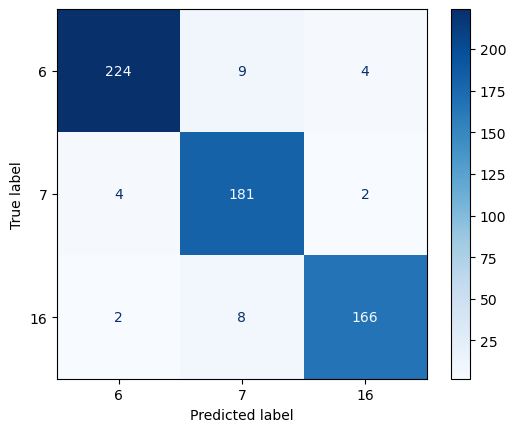

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol_final.classes_)
disp.plot(cmap=plt.cm.Blues)


# 5.Creación y Aplicación del modelo 2


Random Forest

Crea un modelo de clasificación utilizando el algoritmo Random Forest con una semilla aleatoria establecida en 1 para garantizar la reproducibilidad de los resultados.


In [ ]:
rf_model = RandomForestClassifier(random_state=1)

El modelo se entrena para aprender a predecir las etiquetas de clase en base a las
características de los datos de entrenamiento.

In [ ]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

Genera predicciones utilizando el modelo Random Forest (rf_model) previamente entrenado

In [ ]:
preds_train_rf = rf_model.predict(X_train)
preds_test_rf = rf_model.predict(X_test)

Calcula varias matrices de confusión para evaluar el rendimiento del modelo Random Forest
en los conjuntos de datos de entrenamiento y prueba

In [ ]:
cm_train_rf = confusion_matrix(Y_train, preds_train_rf, labels=rf_model.classes_)
cm_train_norm_rf = confusion_matrix(Y_train, preds_train_rf, labels=rf_model.classes_, normalize='all')
cm_test_rf = confusion_matrix(Y_test, preds_test_rf, labels=rf_model.classes_)
cm_test_norm_rf = confusion_matrix(Y_test, preds_test_rf, labels=rf_model.classes_, normalize='all')

Crea una figura de cuatro subgráficos para visualizar las matrices de confusión
y las versiones normalizadas de las matrices de confusión

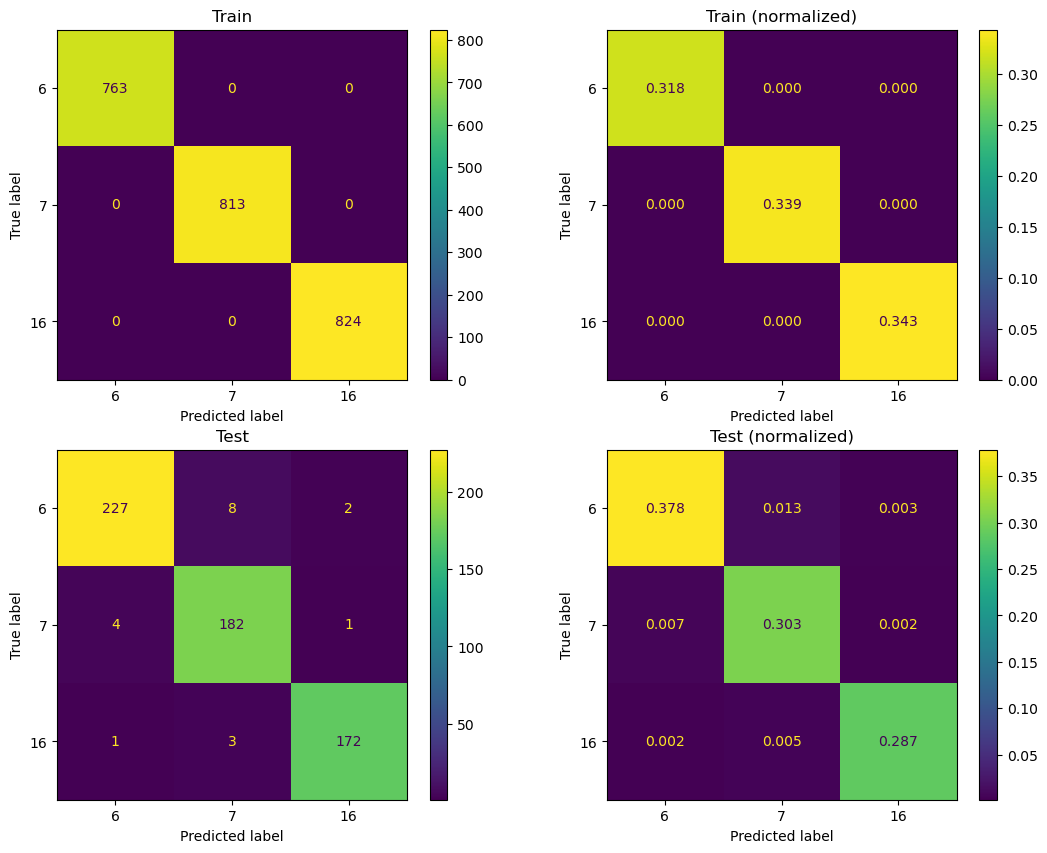

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 10))
ConfusionMatrixDisplay(confusion_matrix=cm_train_rf, display_labels=rf_model.classes_).plot(ax=ax1, values_format=',.0f')
ConfusionMatrixDisplay(confusion_matrix=cm_train_norm_rf, display_labels=rf_model.classes_).plot(ax=ax2, values_format='.3f')
ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=rf_model.classes_).plot(ax=ax3, values_format=',.0f')
ConfusionMatrixDisplay(confusion_matrix=cm_test_norm_rf, display_labels=rf_model.classes_).plot(ax=ax4, values_format='.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

Los resultados indican un alto rendimiento del modelo en ambos conjuntos, tanto en el conjunto de entrenamiento como en el conjunto de prueba.

Accuracy : El modelo alcanza una exactitud del 96.83% en el conjunto de prueba. En el conjunto de entrenamiento, el modelo ha aprendido a predecir todas las instancias correctamente. En el conjunto de prueba, el modelo tiene un rendimiento ligeramente inferior, pero aún mantiene una alta precisión.

Precision : La precisión en el conjunto de prueba es del 96.87%, respectivamente. Esto significa que el modelo minimiza las falsas alarmas y clasifica correctamente la gran mayoría de las instancias positivas.

Recall : El modelo muestra un recall del 96.83% en el conjunto de prueba. Esto indica que el modelo es eficiente para identificar ejemplos positivos en ambos conjuntos de datos.

F1 Score : La puntuación F1 en el conjunto de prueba es del 96.84%. Esta métrica combina tanto la precisión como el recall en una sola métrica y es especialmente útil cuando hay un desequilibrio entre las clases. Los valores altos de F1 indican un buen equilibrio entre precisión y recall.

In [ ]:
metrics_df = pd.DataFrame([
    {
        'Train': accuracy_score(Y_train, preds_train_rf),
        'Test': accuracy_score(Y_test, preds_test_rf)
    },
    {
        'Train': precision_score(Y_train, preds_train_rf, average='weighted'),
        'Test': precision_score(Y_test, preds_test_rf, average='weighted')
    },
    {
        'Train': recall_score(Y_train, preds_train_rf, average='weighted'),
        'Test': recall_score(Y_test, preds_test_rf, average='weighted')
    },
    {
        'Train': f1_score(Y_train, preds_train_rf, average='weighted'),
        'Test': f1_score(Y_test, preds_test_rf, average='weighted')
    }
], index=['Accuracy', 'Precision', 'Recall', 'F1'])
print(metrics_df)

           Train      Test
Accuracy     1.0  0.968333
Precision    1.0  0.968695
Recall       1.0  0.968333
F1           1.0  0.968394


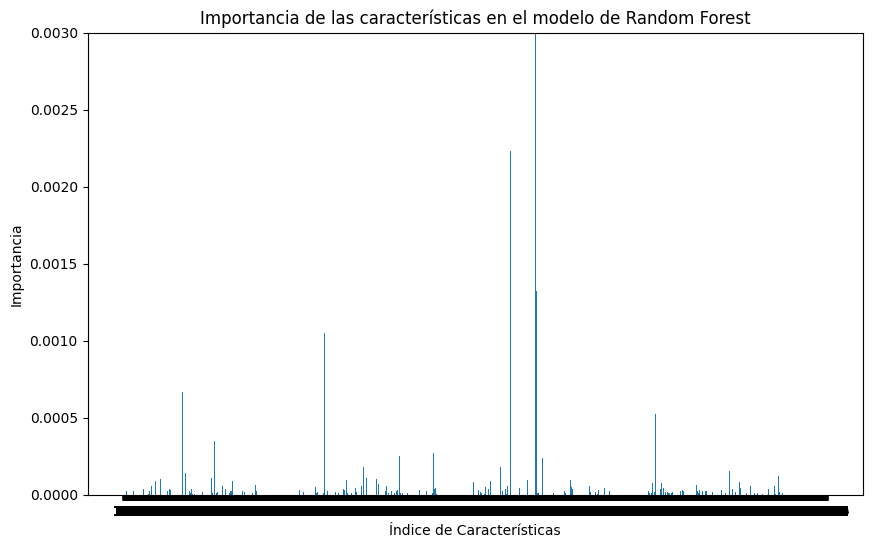

In [ ]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_

# Crear un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), range(len(feature_importances)))  # Puedes personalizar las etiquetas del eje x si lo deseas
plt.xlabel('Índice de Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características en el modelo de Random Forest')
plt.ylim(0, 0.003)
plt.show()

In [ ]:
import pandas as pd

# Convertir la matriz dispersa a un DataFrame
X_df = pd.DataFrame(X_train.toarray())

In [ ]:
from sklearn.tree import export_text

# Obtener un árbol específico del modelo
tree = rf_model.estimators_[0]

# Visualizar el árbol en texto
tree_text = export_text(tree, feature_names=X_df.columns.tolist())
print(tree_text)


|--- 27224 <= 0.02
|   |--- 12849 <= 0.02
|   |   |--- 26848 <= 0.01
|   |   |   |--- 26096 <= 0.02
|   |   |   |   |--- 8116 <= 0.03
|   |   |   |   |   |--- 10051 <= 0.03
|   |   |   |   |   |   |--- 7223 <= 0.02
|   |   |   |   |   |   |   |--- 25656 <= 0.02
|   |   |   |   |   |   |   |   |--- 1476 <= 0.02
|   |   |   |   |   |   |   |   |   |--- 7054 <= 0.01
|   |   |   |   |   |   |   |   |   |   |--- 12796 <= 0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 49
|   |   |   |   |   |   |   |   |   |   |--- 12796 >  0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- 7054 >  0.01
|   |   |   |   |   |   |   |   |   |   |--- 11752 <= 0.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- 11752 >  0.05
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- 1476 >  0.02
|

# Creacion y aplicacion de Modelo 3

In [ ]:
X_trainval, X_val, Y_trainval, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


k = 4
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
# Fit the model to the training data
knn.fit(X_trainval, Y_trainval)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
preds_train_knn = knn.predict(X_trainval)
preds_test_knn = knn.predict(X_val)

In [ ]:
cm_train_knn = confusion_matrix(Y_trainval, preds_train_knn, labels=knn.classes_)
cm_train_norm_knn = confusion_matrix(Y_trainval, preds_train_knn, labels=knn.classes_, normalize='all')
cm_test_knn = confusion_matrix(Y_val, preds_test_knn, labels=knn.classes_)
cm_test_norm_knn = confusion_matrix(Y_val, preds_test_knn, labels=knn.classes_, normalize='all')

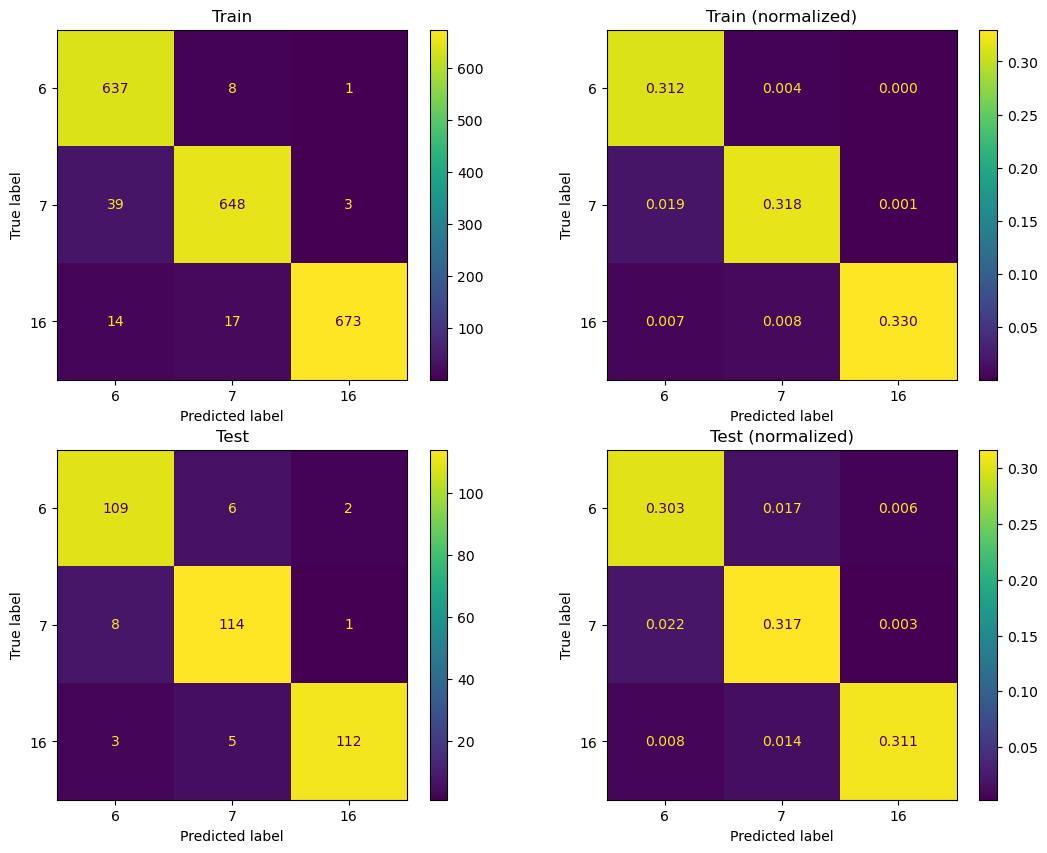

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 10))
ConfusionMatrixDisplay(confusion_matrix=cm_train_knn, display_labels=knn.classes_).plot(ax=ax1, values_format=',.0f')
ConfusionMatrixDisplay(confusion_matrix=cm_train_norm_knn, display_labels=knn.classes_).plot(ax=ax2, values_format='.3f')
ConfusionMatrixDisplay(confusion_matrix=cm_test_knn, display_labels=knn.classes_).plot(ax=ax3, values_format=',.0f')
ConfusionMatrixDisplay(confusion_matrix=cm_test_norm_knn, display_labels=knn.classes_).plot(ax=ax4, values_format='.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

In [ ]:
metrics_df = pd.DataFrame([
    {
        'Train': accuracy_score(Y_trainval, preds_train_knn),
        'Test': accuracy_score(Y_val, preds_test_knn)
    },
    {
        'Train': precision_score(Y_trainval, preds_train_knn, average='weighted'),
        'Test': precision_score(Y_val, preds_test_knn, average='weighted')
    },
    {
        'Train': recall_score(Y_trainval, preds_train_knn, average='weighted'),
        'Test': recall_score(Y_val, preds_test_knn, average='weighted')
    },
    {
        'Train': f1_score(Y_trainval, preds_train_knn, average='weighted'),
        'Test': f1_score(Y_val, preds_test_knn, average='weighted')
    }
], index=['Accuracy', 'Precision', 'Recall', 'F1'])
print(metrics_df)

              Train      Test
Accuracy   0.959804  0.930556
Precision  0.961073  0.931446
Recall     0.959804  0.930556
F1         0.959932  0.930789


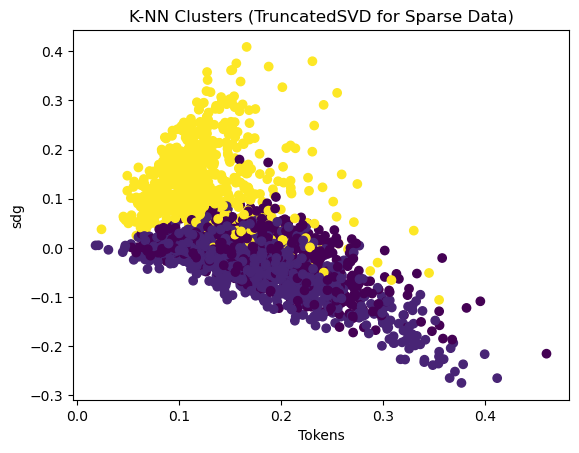

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Reducción de dimensionalidad con TruncatedSVD
svd = TruncatedSVD(n_components=3)  # Reducir la dimensionalidad a 2 componentes principales
X_reduced = svd.fit_transform(X_trainval)

# Crea y entrena el modelo K-NN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_reduced, Y_trainval)

# Visualiza los clusters en el espacio de 2D
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=knn.predict(X_reduced), cmap='viridis')
plt.xlabel("Tokens")
plt.ylabel("sdg")
plt.title("K-NN Clusters (TruncatedSVD for Sparse Data)")

plt.show()


## Resultados
